# EPR-Übungsblatt n°9

Ausgabe: 28.01.2026 <br>
Abgabe: 07.02.2026, 12Uhr
<br>
<div style="text-align: justify">Hinweise:
<br>
<br>- Alle Funktionen sollen das final berechnete Ergebnis mittels <em>return</em> auch zurückgeben. Wir empfehlen das Ergebnis zu testen (wie zum Beispiel in 3.1). Nur die Funktionen, jedoch nicht die Tests gehen ein in die Bewertung. 
<br>- Vor der Abgabe, starten Sie den Kernel neu und führen Sie dann mittels 'run all' alle Zellen aus.  
<br>- Verwenden Sie um auf Datensätze aus dem <em>seaborn</em>-Modul zuzugreifen und diese als Pandas Dataframe zu speichern den Befehl:</div><br>
    
    data_df = sns.load_dataset("Name_des_Datensatzes")

In [14]:
__author__ : "7155628, Keller"

In [15]:
""" Importe - Vor dem erstmaligen Ausführen der folgenden Zellen führen Sie diese Zelle zuerst aus.
Stellen Sie hierfür sicher, dass die hierunter stehenden Module in der ausführenden 
Python-Instanz installiert sind (Kommandozeile: pip list). Falls dies nicht der Fall ist, 
ergänzen Sie die Pakete zu ihrer ausführenden Python-Instanz und führen Sie diese Zelle erst anschließend 
aus. Die Module copy und random sind in allen Python 3.X Distributionen enthalten und müssen 
nicht manuell installiert werden."""
import copy
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Aufgabe 3: Numpy Arrays und Pandas Dataframes
<br>


### Aufgabe 3.1 (0.5 Punkte)
<br>
<div style="text-align: justify">Schreiben Sie eine Funktion, welche einen Numpy-Array entgegennimmt, und diesen in einen Numpy-Array mit nur einer Achse umwandelt. Benutzten Sie hierfür NICHT die <em>ravel</em> Funktion. Sie können die Tests in der nächsten Spalte nutzen um zu testen, ob Ihre Funktion stimmt. </div>
<br>

In [16]:
# Code zu Aufgabe 3.1:

def transform_array(n_array):
    """
    n_array : input numpy array
    return: numpy array transformed to single axis array.
    """
    # get shape of the numpy array
    array_shape = n_array.shape
    # Bestimmung der neuen Dimensionen
    new_shape = np.prod(array_shape)
    
    # Umformung des Vektors in die gewünschte Dimensionen
    ### Ihr Code hier
    new_array = np.array([])

    for axis in n_array:
        new_array = np.append(new_array, axis)
    return new_array

In [17]:
# Tests (empfohlen - wird nicht bewertet)

# Test for 1D array
n_array = np.zeros((10))
new_array = transform_array(n_array)
print(new_array.shape)
assert new_array.shape == (10, )

# Test for 2D array
n_array = np.zeros((10, 10))
new_array = transform_array(n_array)
print(new_array.shape)
assert new_array.shape == (100, )

# Test for higher dimensional array
n_array = np.zeros((2, 2, 2, 2, 2))
new_array = transform_array(n_array)
print(new_array.shape)
assert new_array.shape == (32, )

(10,)
(100,)
(32,)


### Aufgabe 3.2 (1 Punkt)
<br>
<div style="text-align: justify">Erstellen Sie mittels eines commands einen Numpy-Array der Dimension <em>(10, 1)</em> gefüllt mit den Zahlen von 0 bis 9 und einen weiteren Numpy-Array der Dimension <em>(10, 1)</em> gefüllt mit Einsen. Erstellen Sie einen dritten Numpy-Array der Dimension <em>(10, 1)</em>, der in 2er-Schritten von 18 bis 0 runterzählt. Addieren Sie alle drei Vektoren zu einem dritten Vektor und dividieren Sie diesen anschließend durch <em>&pi;</em>.</div>
<br>

In [18]:
# Code zu Aufgabe 3.2:

one_to_ten = np.array([i for i in range(10)])
ones = np.array([1 for i in range(10)])
countdown = np.array([18-2*i for i in range(10)])

sum = (one_to_ten + ones + countdown)/np.pi

print(one_to_ten)
print(ones)
print(countdown)
print(sum)


[0 1 2 3 4 5 6 7 8 9]
[1 1 1 1 1 1 1 1 1 1]
[18 16 14 12 10  8  6  4  2  0]
[6.04788784 5.72957795 5.41126807 5.09295818 4.77464829 4.45633841
 4.13802852 3.81971863 3.50140875 3.18309886]


### Aufgabe 3.3 (0.75 Punkte)
<br>
<div style="text-align: justify">Erstellen Sie einen Numpy-Array mit den Zahlen 0-8 der Dimension <em>(9,)</em> und wandeln Sie diesen in eine Matrix (Numpy-Array) mit den Dimensionen <em>(3,3)</em> um. Extrahieren Sie den Vektor der letzten Spalte der Matrix und speichern Sie diesen in einer neuen Variable. Erklären Sie in Worten, welche Werte sich in diesem neuen Vektor befinden und was das darüber aussagt, in welcher Reihenfolge Numpy einen Vektor in eine Matrix transformiert? Was würde passieren, wenn der ursprüngliche Vektor im ersten Schritt stattdessen in eine Matrix der Form (3, 2) umgewandelt werden würde?</div>
<br>

In [19]:
# Code zu Aufgabe 3.3:

arr = np.arange(9)
mat = arr.reshape(3, 3)
extracted_vec = mat[:, [2]]


#### Textantwort zu Aufgabe 3.3
In dem extrahierten Vektor befinden sich die Werte 2,5,8. Das zeigt, dass beim reshaping jeweils in einer Zeile Spaltenweise aufgefüllt wird. Das ist analog zum indexen einer Matrix in der Mathematik. Bei einer Form von (3,2) wäre nicht genug platz (3*2 = 6) um alle Elemente(9) aufzunehmen.

### Aufgabe 3.4 (0.75 Punkte)
<br>
<div style="text-align: justify">Schreiben Sie eine Funktion, welche eine Liste mit einer geraden Anzahl <em>n</em> an floats entgegennimmt und diese in einen Numpy-Array der Dimension <em>(2, n/2)</em> umwandelt. Die Funktion soll anschließend aus diesem Numpy-Array ein Pandas-Dataframe mit n/2 Spalten und jeweils <em>2</em> Datensätzen generieren. Die Spaltennamen des Pandas-Dataframe sollen von <em>Spalte_0</em> bis <em>Spalte_(n/2 -1)</em> benannt werden.</div>
<br>

In [20]:
# Code zu Aufgabe 3.4:
def list_to_array_to_dataframe(floats_list):
    """
    floats_list : Input-Liste an floats der Menge n, list
    """
    ## Fügen Sie hier den entsprechend Code ein um die Aufgabe zu erfüllen.
    n = len(floats_list)
    np_arr = np.array(floats_list).reshape(2, n//2)
    col_names = [f"Spalte_{i}" for i in range(n//2)]
    df = pd.DataFrame(np_arr, columns=col_names)

    return df
    pass


In [21]:
# Test (empfohlen - wird nicht bewertet)
floats_list = [0.5, 3.12, 9.33, 0.52, 8.91, 1.11, 6.33, 2.22]
floats_df = list_to_array_to_dataframe(floats_list)
floats_df.head()

,Spalte_0,Spalte_1,Spalte_2,Spalte_3
0,0.50,3.12,9.33,0.52
1,8.91,1.11,6.33,2.22


### Aufgabe 3.5 (1 Punkt)
<br>
<div style="text-align: justify">Laden Sie den Datensatz <em>mpg</em> aus dem Modul <em>seaborn</em> in einen pandas DataFrame.
Welche Spalten gibt es in diesem Datensatz? Geben Sie dazu die ersten 3 Reihen des DataFrame aus. 

Geben Sie den Datenpunkt mit dem Index 10 aus dem DataFrame aus. 

Plotten Sie die Spalten <em>horsepower</em> gegen <em>acceleration</em> in einem Scatterplot. Benenne die Achsen entsprechend und füge einen Titel hinzu. 
</div>
<br>

Spalten des Datasets lauten:
 Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')
Ersten 3 Reihen des Datasets lauten:
     mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
Eintrag mit Index 10: 
 mpg                            15.0
cylinders                         8
displacement                  383.0
horsepower                    170.0
weight                         3563
acceleration                   10.0
model_year                       70
origin                        

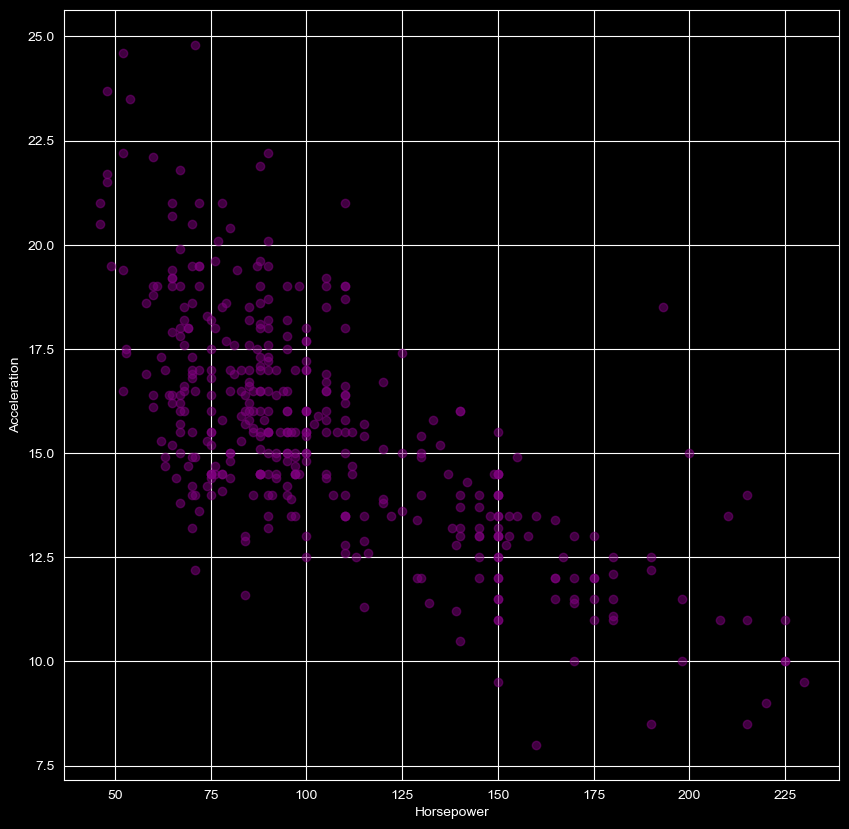

In [22]:
# Code zu Aufgabe 3.5:
df = sns.load_dataset("mpg")

print(f"Spalten des Datasets lauten:\n {df.columns}")
print(f"Ersten 3 Reihen des Datasets lauten:\n {df.head(3)}")
print(f"Eintrag mit Index 10: \n {df.iloc[10]}")

plt.figure(figsize=(10, 10))
plt.scatter(df["horsepower"], df["acceleration"], color="purple", alpha = 0.5)
plt.xlabel('Horsepower')
plt.ylabel('Acceleration')
plt.show()


## Aufgabe 4: Datenanalyse & K-Means
<br>

### Aufgabe 4.1 (0.5 Punkte)
<br>
<div style="text-align: justify">Untersuchen Sie den Datensatz <em>iris</em>, welcher im Paket <em>seaborn</em> enthalten ist. Dieser beschreibt verschiedene Ausprägungen von drei Irissorten anhand verschiedener Maße der Pflanze. Wie viele und welche Arten von Features enthält der Datensatz? Geben Sie außerdem an, wie viele Zeilen im Datensatz vorhanden sind. </div>
<br>

In [23]:
# Code zu Aufgabe 4.1:

iris_df = sns.load_dataset("iris")
#print(df)
print(f"Arten der features: {iris_df.columns.to_list()}")
print(f"Anzahl der features: {len(iris_df.columns.to_list())}")
print(f"Anzahl der Zeilen im Datensatz: {len(iris_df)}")

Arten der features: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
Anzahl der features: 5
Anzahl der Zeilen im Datensatz: 150


##### Textantwort zu Aufgabe 4.1

Der Datensatz enthält 5, neben der species selbst 4 verschiedene Arten von Features. Diese Features lauten: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']. Die Anzahl an Zeilen im Datensatz beträgt 150.


### Aufgabe 4.2 (2 Punkte)
<br>
<div style="text-align: justify">Wir möchten nun die Daten standardisieren. Dies Erfolgt nach der folgenden Formel:</div>

$$y = (x - \mu)\: /\: \sigma$$

mit 
$$ $$ 
$x$ als einzelnen Wert in einer Spalte,
$$ $$
$\mu$ als Mittelwert aller Werte in einer Spalte,
$$ $$
$\sigma$ als Standardabweichung aller Werte in einer Spalte
$$ $$
<div style="text-align: justify">Schreiben Sie eine Funktion, welche einen Pandas DataFrame entgegennimmt und alle nummerischen Features (Datentypen <em>float</em> und <em>int</em>) standardisiert und wieder einen Pandas DataFrame zurück gibt. 

Die Verwendung der Funktion <em>sklearn.preprocessing.StandardScaler()</em> oder ähnlicher Implementierungen ist ausgeschlossen.</div>
<br>

Berechnen Sie mit dieser Funktion dann eine standardisierte Version des Iris Datensatzes.

Implementieren Sie die Funktion plot_features() um zwei Features aus dem DataFrame in einem Scatterplot gegeneinander zu plotten. 



In [24]:
# Code zu Aufgabe 4.2

def standardize(data_df):
    """
    Standardisierung der numerischen Werte Pandas DataFrames.
    data_df : Pandas Dataframe das standardisiert werden soll, pandas.Dataframe 
    """
    # Kopieren des Dataframes stellt  eine Hülle für die standardisierten Werte bereit 
    standardized_df = copy.deepcopy(data_df)

    # Ihre Implementierung hier

    for col in standardized_df.columns:
        if col == "species":
            continue
        col_vals = standardized_df[col]
        mean = np.mean(col_vals)
        sigma = np.std(col_vals)
        normalized_data = [(x-sigma)/mean for x in col_vals]
        standardized_df[col] = normalized_data

    return standardized_df


def plot_features(df, feat_x, feat_y):
    """
    Erstellen Sie eine Funktion, welche einen scatter plot erstellt mit den Spalten feat_x & feat_y
    df :  Pandas Dataframe
    feat_x (str): Gibt das Feature an, welches auf der X-Achse geplottet werden soll.
    feat_y (str): Gibt das Feature an, welches auf der Y-Achse geplottet werden soll.
    """

    plt.figure(figsize=(10, 10))
    plt.scatter(df[feat_x], df[feat_y], color="purple", alpha = 0.5)
    plt.xlabel(feat_x)
    plt.ylabel(feat_y)
    plt.show()


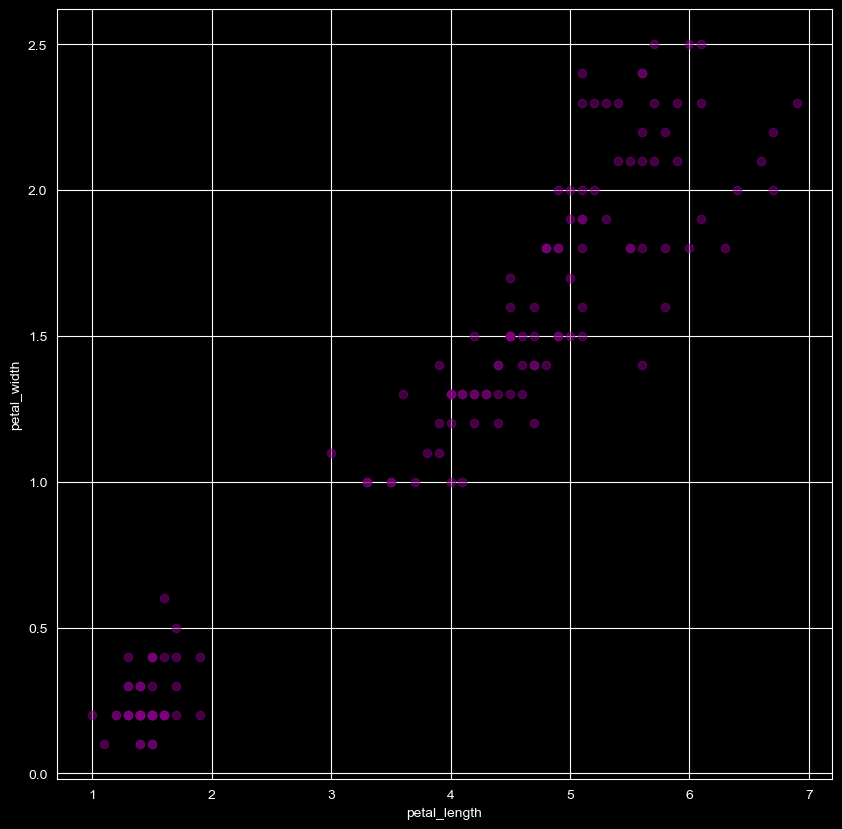

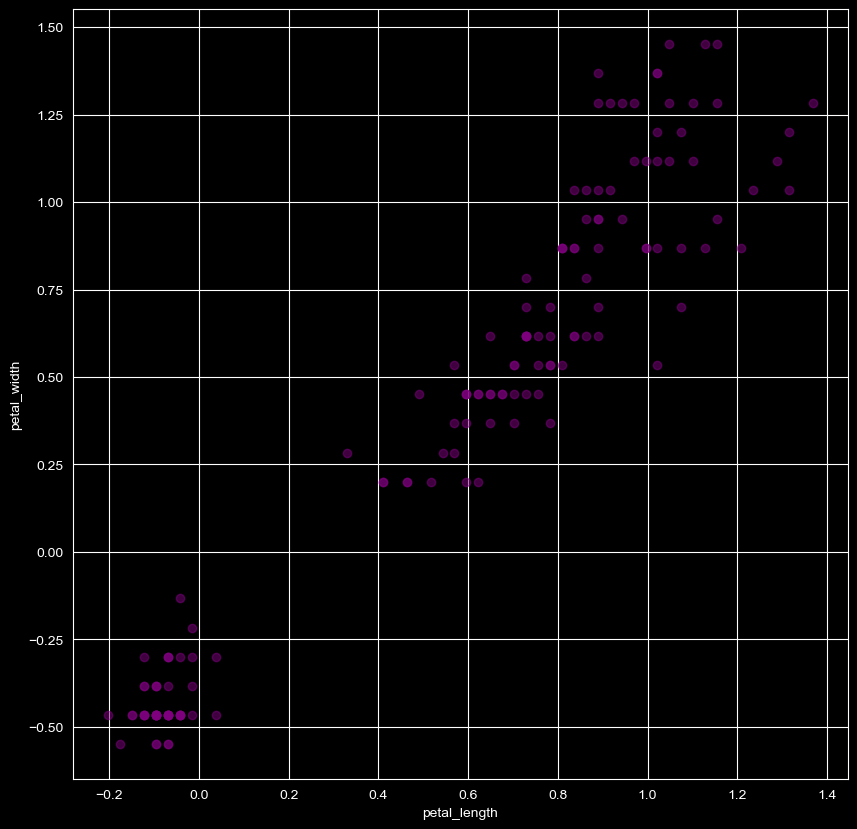

(150, 2)


In [25]:
# Führen Sie diese Zelle aus, nachdem Sie die entsprechenden Funktionen implementiert haben.
standardized_iris_df = standardize(iris_df) # iris_df ist der in Aufgabe 4.1 geladene DataFrame

# Features plotten
plot_features(iris_df, 'petal_length', 'petal_width')
plot_features(standardized_iris_df, 'petal_length', 'petal_width')

# Hier wird ein Numpy Array generiert, welche die Features petal_length und petal_width enthält. 
X = np.array(standardized_iris_df[['petal_length', 'petal_width']])
print(X.shape)

### Aufgabe 4.3 (1.5 Punkte)
<br>
<div style="text-align: justify">Wir werden nun den K-Means Algorithmus vervollständigen und auf das Iris-Datenset anwenden. 
In der nächsten Zelle sind einige der Funktionen für den K-Means Algorithmus schon implementiert. Allerdings fehlt noch die 'predict()' Funktion, welche es erlaubt einen neuen Datenpunkt einem der bestehenden Clustern zuzuordnen. Implementieren Sie diese Funktion. Im Code unten finden Sie eine Beschreibung dessen, was in der Funktion berechnet werden soll. 
<br>
<br>
Für die Abgabe, initiieren Sie zuerst die Klasse <em>KMeans</em> und führen Sie die .fit() mit den wie oben standardisierten Daten aus. Wir nutzen hier nur die petal length und petal width, wie oben beschrieben. Bei der Ausführung entstehen nun Plots des Clusterings, welche die Entwicklung der Cluster und Cluster-Mittelpunkte in den einzelnen Schritten zeigen. 
<br>
Nutzen Sie die predict-Funktion, um den Datenpunkt (0, 0) einem Cluster zuzuordnen, nachdem der Algorithmus für 10 Iterationen ausgeführt wurde. 

<br>
<br>
Wie verändert sich das Ergebnis, wenn die Anzahl der Cluster (<em>K</em>) erhöht wird? </div>



In [ ]:
##########################################################################################################
################################# DIESEN ABSCHNITT NICHT VERÄNDERN !!! ################################### 
##########################################################################################################

class KMeans():
    """
    Modell zum Durchführen von Clustering nach der K-Means Logik.
    """
    
    def __init__(self, K=1, nb_iters=10, random_seed=42,):
        """
        K : Anzahl der Cluster-Mittelpunkte, int
        nb_iters : Anzahl der Optimierungsschritte, int
        random_seed : Startpunkt zum Generieren zufälliger Werte, int
        """
        self.K = K
        self.nb_iters = nb_iters * 2
        self.random_seed = random_seed
        self.all_losses = []
        self.all_mus = []
        self.all_rs = []

    
    def calculate_loss(self, X):
        """
        Berechnung des Fehlerterms in der Zielfunktion. Dies wird nur für die Plots benötigt und muss nicht unbedingt Teil der Klasse
        KMeans() sein. 
        X : Daten als Matrix mit den Dimensionen (n_samples x n_features), numpy.Array
        """
        loss = 0
        # Berechnung des Fehlers pro Cluster 
        for k in range(self.K):
            # Quadratische euklidische Distanz der Punkte zu jedem Cluster-Mittelpunkt 
            mse = np.mean((X - self.mu[k])**2, axis=1)
            # Trennung der Punkte nach Cluster
            k_indices = np.where(self.r[:, k] == 1)[0]
            # Berechnung des kumulativen Fehlers
            loss += np.sum(mse[k_indices])
        return loss
    

    def update_storage(self, X):
        """
        Dokumentation der Werte pro Iteration im Algorithmus. Die jeweils neuen Werte pro Schritt werden in Listen gespeichert. Diese 
        Funktion ist auch nur für das Plotten relevant und muss nicht Teil des eigentlichen KMeans Algorithmus sein. 
        X : Daten als Matrix mit den Dimensionen (n_samples x n_features), numpy.Array
        """
        # Berechnung des Fehlerterms in der Zielfunktion
        loss = self.calculate_loss(X)
        # Dokumentation der Mittelpunkt-Positionen zur späteren Auswertung / Visualisierung
        self.all_mus.append(self.mu.copy())
        # Dokumentation der Punkte-Cluster Zuordnungen zur späteren Auswertung / Visualisierung
        self.all_rs.append(self.r.copy())
        # Dokumentation des Fehlerterms zur späteren Auswertung / Visualisierung
        self.all_losses.append(loss)
        

    def initialize_means(self, X):
        """
        Initiierung der Startpositionen der Cluster-Mittelpunkte. Hier werden zufällige Werte aus X als Startwerte der Cluster-Mittelpunkte 
        selektiert. 
        X : Daten als Matrix mit den Dimensionen (n_samples x n_features), numpy.Array
        """
        # Generierung von Zufallszahlen zur Replizierbarkeit fixieren
        random.seed(self.random_seed)
        # Auslesen der Dimensionen der Matrix
        n_samples, n_features = X.shape
        # Aufspannen eines Vektors pro Cluster-Mittelpunkte mit den Dimensionen (1 x n_features)
        self.mu = np.zeros((self.K, n_features))
        # Wählen eines zufälligen Datensatzes zur Initialisierung für jedes Cluster
        for k in range(self.K):
            # Wählen von zufälligen Punkten des Datensatzes als Position des Cluster-Mittelpunkts
            self.mu[k] = X[random.randint(0,n_samples-1)]
        self.r = np.zeros((n_samples, self.K))
        # Zuteilung aller Werte zum ersten Cluster
        self.r[:, 0] = 1
        # Speichern der Werte in Instanzen-Attributen
        self.update_storage(X)
        

    def expectation_step(self, X):
        """
        Durchführung eines Erwartungsschritts
        X : Daten als Matrix mit den Dimensionen (n_samples x n_features), numpy.Array
        """
        # Anzahl der Datenpunkte
        n_samples = len(X)
        # Aufspannen eines Vektors pro Cluster-Mittelpunkt mit den Dimensionen (n_samples x 1) 
        distances = np.zeros((n_samples, self.K))
        # Separate Berechnung der Entfernung aller Datenpunkte von jedem Cluster-Mittelpunkt
        for k in range(self.K):
            # Berechnung der quadrierten euklidischen Distanz von jedem Datenpunkt zum Mittelpunkt
            distances[:, k] = np.sum((X - self.mu[k]) ** 2, axis=1)
        # Optimierungsschritt (welcher Punkt ist von welchem Mittelpunkt am wenigsten entfernt?)
        minima_index = np.argmin(distances, axis=1)
        self.r *= 0
        self.r[np.arange(n_samples), minima_index] = 1
        # Speichern der Werte in Instanzen-Attributen
        self.update_storage(X)
    
    
    def maximization_step(self, X):
        """
        Durchführung eines Maximierungsschritts. 
        X : Daten als Matrix mit den Dimensionen (n_samples x n_features), numpy.Array
        """
        # Distanzminimale Position für jeden Cluster-Mittelpunkt neu berechnen
        for k in range(self.K):
            # Filtern nach Datenpunkten, welche dem Cluster des jeweiligen Mittelpunkts zugeordnet sind
            k_indices = np.where(self.r[:, k] == 1)
            # Berechnen der Mittelwerte der Punkte über alle Dimensionen
            self.mu[k] = np.mean(X[k_indices], axis=0)
        # Speichern der Werte in Instanzen-Attributen
        self.update_storage(X)
    
    # 
    def fit(self, X):
        """
        Der Algorithmus wird hier auf die Daten X gefittet. 
        X : Daten als Matrix mit den Dimensionen (n_samples x n_features), numpy.Array
        """
        # Bestimmung der Startposition der Cluster-Mittelpunkte
        self.initialize_means(X)
        # Iteration durch die vorgegebene Anzahl an Durchläufen des Algorithmus
        for i in range(self.nb_iters):
            # Durchführung eines Erwartungsschritts
            self.expectation_step(X)
            # Durchführung eines Maximierungsschritts
            self.maximization_step(X)
            # Visualisieren der Zwischenergebnisse zum Ende der Iteration
            self.plot_results(X, i)
    

    # Visualisierung der Ergebnisse
    def plot_results(self, X, step_index):
        """
        X : Daten als Matrix mit den Dimensionen (n_samples x n_features), numpy.Array
        step_index : Anzahl des Optimierungsschritts, int
        """
        # Festlegen der Farben
        colors = plt.cm.Set3(np.linspace(0, 1, self.K))
        # Aufziehen eines Grids für Graphen
        fig, ax = plt.subplots(figsize=(10, 5), ncols=2)
        # Plotten jedes Clusters
        for k in range(self.K):
            k_indices = np.where(self.all_rs[step_index][:, k] == 1)
            ax[0].scatter(X[k_indices, 0], X[k_indices, 1], color=colors[k])
            x = [ac[k, 0] for ac in self.all_mus[:step_index+1]]
            y = [ac[k, 1] for ac in self.all_mus[:step_index+1]]
            ax[0].plot(x, y, 'x-', color='k', ms=9, mew=2)
        # Benennung der Graphenbestandteile
        ax[0].set_title('Zuweisung der Punkte zu Clustern')
        ax[1].plot(self.all_losses[:step_index+1], 'o-')
        ax[1].set_title('Wertentwicklung der Zielfunktion')

        ax[0].set_xlabel('Petal length')
        ax[1].set_ylabel('Petal width')
        # Benennung der einzelnen Schritte
        if step_index == 0:
            step_type = 'Initialisierungs'
            step_nb = 0
        else:
            step_type = 'Erwartungs' if (step_index ) % 2 != 0 else 'Maximierungs'
            step_nb = (step_index - 1) // 2 + 1
        fig.suptitle(f'{step_type}schritt {step_nb}', fontsize=22)
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])


##########################################################################################################
############################### DEN OBEREN ABSCHNITT NICHT VERÄNDERN !!! #################################
##########################################################################################################


    def predict(self, X_test):
        """
        Implementieren Sie diese Funktion. Die Funktion soll auf die bestehenden Cluster zugreifen und jeden neuen Datenpunkt einem dieser 
        Cluster zuteilen. 
        Die Funktion soll außerdem den Mittelpunkt des zugeteilten Clusters ausgeben (drucken). 
        X_test (numpy array): Datenpunkte auf denen der Algorithmus getestet werden soll. Shape: (n_test_samples, n_features)
        return: liste oder numpy array welche die Clusterzugehörigkeit pro Datenpunkt enthält.
        """
        ## Ihr Code hier




In [ ]:
# Ausführung des K-Means Algorithmus auf den standardisierten Datensatz
model = KMeans(K=2, nb_iters=2, random_seed=0)
model.fit(X)

In [ ]:
# Weiterer Code zu Aufgabe 4.3


##### Textantwort zu Aufgabe 4.3

Text